## Group 7 - Predicting Alcohol sales demand during the Christmas Season using Machine Learning Techniques

### Group Members : 
### Hettige Don Ruwindhu Chandraratne 
### Thimantha Vidanagamage
### Suheet Sonawane
### Samarpan Pandey
### Tirthesh Jani 

### Header Documentation 

### Problem Statement 

Liquor stores in the state of Iowa, United States generate the highest monthly sales every year during December (Christmas Season) which is around 15 - 20 percent of their annual sales. However, due to incorrect Sales predictions which the sales professionals (in stores) calculate by the moving average through the last 5 years, the Supply chain of the majority of liquor stores tends to be disrupted. This is because only year and month are considered as factors for these sales predictions while excluding other essential factors such as product and vendor. Even though these sales professionals do not possess with any technical knowldege related to Aritificial Intelligence, they require a predictive model to predict liquor sales. The objective of this project is to build a predictive model using an AutoML to predict daily liquor sales in December with time series forecasting, as sales professionals in the liquor stores.


### Project Code 

In [1]:
## Importing Necessary Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from hpsklearn import HyperoptEstimator
from lightgbm.sklearn import LGBMRegressor
from hpsklearn import any_regressor, random_forest_regression
from hpsklearn import xgboost_regression , svr_sigmoid, knn_regression
from hpsklearn import any_preprocessing
from hyperopt import fmin, tpe, hp, anneal, Trials
from sklearn.model_selection import KFold, cross_val_score
import joblib
import seaborn as sns 

C:\Users\ruwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ruwin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


C:\Users\ruwin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Reading in the full dataset

ILS = pd.read_csv('Iowa_Liquor_Sales.csv')

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/622713995.py:3: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  ILS = pd.read_csv('Iowa_Liquor_Sales.csv')


###  Simple EDA 

In [3]:
ILS.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')

In [4]:
ILS.shape

(19666763, 24)

In [5]:
ILS.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S24127700024,02/19/2015,3678,"Smoke Shop, The",1918 SE 14TH ST,DES MOINES,50320,POINT (-93.597011 41.570844),77.0,Polk,...,41783,Uv Blue Raspberry Vodka Mini,6,500,4.89,7.34,2,14.68,1.0,0.26
1,S15066200002,10/10/2013,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,Polk,...,904969,Sabe Premiom Sake Double Barrel,6,750,14.99,22.49,6,134.94,4.5,1.19
2,S19323500030,06/03/2014,2607,Hy-Vee Wine and Spirits / Shenandoah,520 SO FREMONT,SHENANDOAH,51601,POINT (-95.385111 40.761736),73.0,Page,...,45277,Paramount White Rum,12,1000,4.34,6.51,12,78.12,12.0,3.17
3,S23334500013,01/06/2015,4810,Kum & Go #518 / Ankeny,3603 NE OTTERVIEW CIRCLE,ANKENY,50021,POINT (-93.572458 41.760989),77.0,Polk,...,43121,Bacardi Superior Rum Mini,12,500,5.54,8.31,1,8.31,0.5,0.13
4,S09742200010,12/27/2012,4025,Karam Kaur Khasriya Llc,702 13TH ST,BELLE PLAINE,52208,POINT (-92.277759 41.897052),6.0,Benton,...,11298,Crown Royal Canadian Whisky,6,1750,31.00,46.49,2,92.98,3.5,0.92


In [6]:
ILS.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [7]:
#Convert Date to Date Format
ILS['Date'] = pd.to_datetime(ILS['Date'])
#Create new column with Month value 
ILS['Month']=  ILS['Date'].dt.month
## Filter dataset to take only records for the month of December
ILS_monthly = ILS.loc[ILS['Month'] == 12]
#To check null values 
ILS_monthly.isnull().sum()

Invoice/Item Number           0
Date                          0
Store Number                  0
Store Name                    0
Address                    9149
City                       9149
Zip Code                   9149
Store Location           170176
County Number              9844
County                     9844
Category                   1829
Category Name              2129
Vendor Number                 0
Vendor Name                   0
Item Number                   0
Item Description              0
Pack                          0
Bottle Volume (ml)            0
State Bottle Cost             0
State Bottle Retail           0
Bottles Sold                  0
Sale (Dollars)                0
Volume Sold (Liters)          0
Volume Sold (Gallons)         0
Month                         0
dtype: int64

In [8]:
#Dropping null values in the coloumn County
ILS_monthly= ILS_monthly.dropna(subset=['County'])
# Dropping null values in the Store Location
ILS_monthly= ILS_monthly.dropna(subset=['Store Location'])
#Checking shape of the Dataset
ILS_monthly.shape

(1602032, 25)

In [9]:
# Counties with most sales
ILS_monthly['County'].value_counts()[:15].index.tolist()
# Convert County values to lower case 
ILS_monthly['County']= ILS_monthly['County'].str.lower()

In [10]:
# Select duplicate rows except first occurrence based on County and Store Number columns
ILS_cleaned = ILS_monthly[ILS_monthly.duplicated('County', keep = 'first')]
ILS_cleaned = ILS_monthly[ILS_monthly.duplicated('Store Number', keep = 'first')]
ILS_cleaned.shape

(1600031, 25)

In [11]:
ILS_cleaned.head(10)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Month
134,S09547600170,2012-12-18,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Paramount White Rum,12,750,3.85,5.77,12,69.24,9.0,2.38,12
304,S09547600045,2012-12-18,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Uv Ivory (vanilla) Vodka,12,750,6.25,9.49,12,113.88,9.0,2.38,12
357,S23198700061,2014-12-26,2590,Hy-Vee Food Store #5 / Cedar Rapids,3235 OAKLAND ROAD NE,CEDAR RAPIDS,52402,POINT (-91.658105 42.010971),57.0,linn,...,Phillips Vodka Ez Pack,12,750,3.57,5.36,12,64.32,9.0,2.38,12
889,S09279900051,2012-12-04,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Evan Williams Honey,12,750,7.94,11.91,12,142.92,9.0,2.38,12
1094,S22969700037,2014-12-16,2353,Cresco Liquor Store,708 2ND AVE SE,CRESCO,52136,POINT (-92.106529 43.371131),45.0,howard,...,2 Gingers,12,750,12.07,18.11,2,36.22,1.5,0.40,12
1146,S16551300083,2013-12-27,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14TH ST,DES MOINES,50320,POINT (-93.596754 41.554101),77.0,polk,...,Fireball Cinnamon Whiskey,6,1750,15.33,23.00,360,8280.00,630.0,166.43,12
1162,S22735700015,2014-12-03,4349,Southside Food Mart,1101 ARMY POST RD,DES MOINES,50315,POINT (-93.628783 41.526511),77.0,polk,...,Hennessy VS,24,200,5.49,8.24,24,197.76,4.8,1.27,12
1169,S22748700224,2014-12-04,2616,Hy-Vee Food and Drug / Clinton,901 SOUTH 4TH ST,CLINTON,52732,POINT (-90.193204 41.836268000000004),23.0,clinton,...,Bowmore 12 Yr Single Malt Scotch,6,750,24.91,37.37,2,74.74,1.5,0.40,12
1363,S23188200088,2014-12-26,2647,Hy-Vee #7 / Cedar Rapids,5050 EDGEWOOD RD,CEDAR RAPIDS,52411,POINT (-91.701581 42.030129),57.0,linn,...,Seagrams 7 Crown Bl Whiskey,6,1750,11.96,17.94,6,107.64,10.5,2.77,12
1459,S09293400128,2012-12-04,2613,Hy-Vee Food Store #1 / Council Bluff,2323 W BROADWAY,COUNCIL BLUFFS,51501,POINT (-95.879662 41.261925),78.0,pottawattamie,...,Hawkeye Vodka 80 Prf Mini,12,500,3.73,5.59,1,5.59,0.5,0.13,12


C:\Users\ruwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bottles Sold', ylabel='count'>

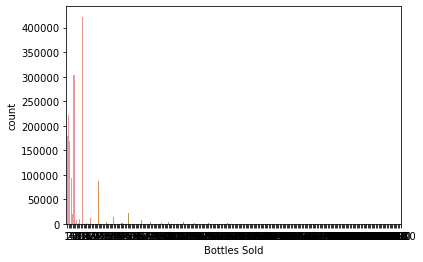

In [12]:
# Count plot for the Bottles Sold
sb.countplot(ILS_cleaned['Bottles Sold'],)

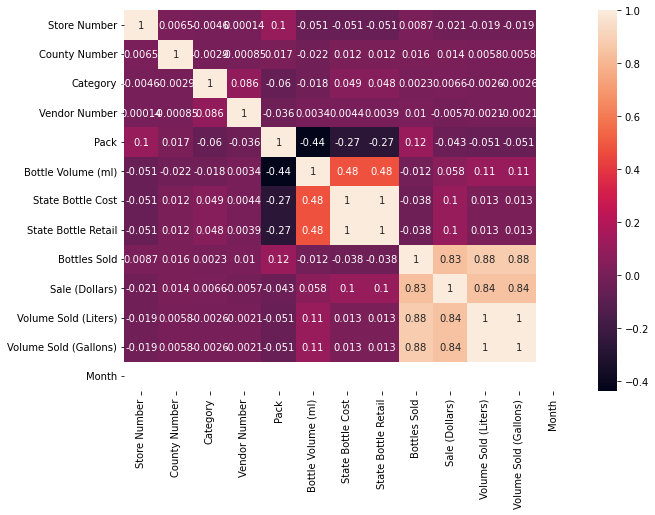

In [13]:
#Performing Correlarion matrix to see what all features affect on the outcome
fig , ax = plt.subplots(figsize = (10,7))
sb.heatmap(ILS_cleaned.corr() , annot = True , ax = ax)
plt.show()

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Store Number'}>,
        <AxesSubplot:title={'center':'County Number'}>,
        <AxesSubplot:title={'center':'Category'}>],
       [<AxesSubplot:title={'center':'Vendor Number'}>,
        <AxesSubplot:title={'center':'Pack'}>,
        <AxesSubplot:title={'center':'Bottle Volume (ml)'}>,
        <AxesSubplot:title={'center':'State Bottle Cost'}>],
       [<AxesSubplot:title={'center':'State Bottle Retail'}>,
        <AxesSubplot:title={'center':'Bottles Sold'}>,
        <AxesSubplot:title={'center':'Sale (Dollars)'}>,
        <AxesSubplot:title={'center':'Volume Sold (Liters)'}>],
       [<AxesSubplot:title={'center':'Volume Sold (Gallons)'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

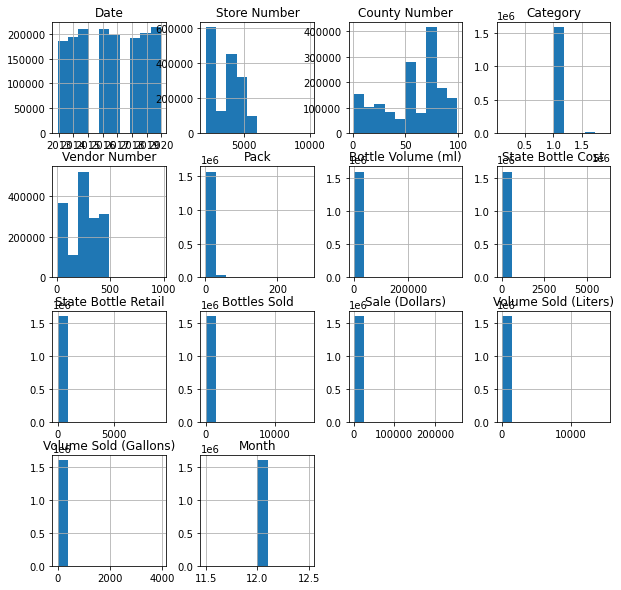

In [14]:
## Hist Plot for dataset

ILS_cleaned.hist(figsize=(10,10))

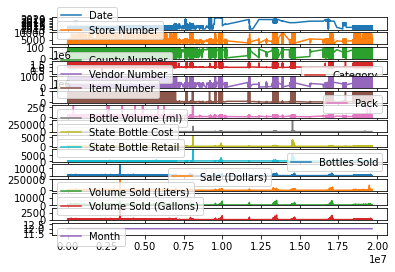

In [15]:
# Cleaned Plot for numeric Variables
ILS_cleaned.plot(subplots=True)

plt.show()

In [16]:
ILS2 = ILS.copy()
ILS2 = ILS2.drop(columns = ['Invoice/Item Number','Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County','Category', 'Category Name', 'Vendor Number', 'Item Number', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'])
ILS2

,Date,Vendor Name,Item Description,Bottles Sold,Sale (Dollars),Month
0,2015-02-19,Phillips Beverage Company,Uv Blue Raspberry Vodka Mini,2,14.68,2
1,2013-10-10,MHW Ltd,Sabe Premiom Sake Double Barrel,6,134.94,10
2,2014-06-03,Luxco-St Louis,Paramount White Rum,12,78.12,6
3,2015-01-06,"Bacardi U.S.A., Inc.",Bacardi Superior Rum Mini,1,8.31,1
4,2012-12-27,Diageo Americas,Crown Royal Canadian Whisky,2,92.98,12
...,...,...,...,...,...,...
19666758,2013-02-13,"Sazerac Co., Inc.",Ice Box Mudslide,6,54.78,2
19666759,2015-01-21,"Sazerac Co., Inc.",Fireball Cinnamon Whiskey,4,20.00,1
19666760,2015-11-24,Phillips Beverage Company,Uv Vodka,12,117.00,11
19666761,2012-04-05,"Bacardi U.S.A., Inc.",Bacardi Superior Rum,6,132.00,4


In [17]:
ILS2['Sale (Dollars)'] = ILS2['Sale (Dollars)'].astype(str).str.replace('$', ' ').astype(float)
ILS2

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/2775448255.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ILS2['Sale (Dollars)'] = ILS2['Sale (Dollars)'].astype(str).str.replace('$', ' ').astype(float)


,Date,Vendor Name,Item Description,Bottles Sold,Sale (Dollars),Month
0,2015-02-19,Phillips Beverage Company,Uv Blue Raspberry Vodka Mini,2,14.68,2
1,2013-10-10,MHW Ltd,Sabe Premiom Sake Double Barrel,6,134.94,10
2,2014-06-03,Luxco-St Louis,Paramount White Rum,12,78.12,6
3,2015-01-06,"Bacardi U.S.A., Inc.",Bacardi Superior Rum Mini,1,8.31,1
4,2012-12-27,Diageo Americas,Crown Royal Canadian Whisky,2,92.98,12
...,...,...,...,...,...,...
19666758,2013-02-13,"Sazerac Co., Inc.",Ice Box Mudslide,6,54.78,2
19666759,2015-01-21,"Sazerac Co., Inc.",Fireball Cinnamon Whiskey,4,20.00,1
19666760,2015-11-24,Phillips Beverage Company,Uv Vodka,12,117.00,11
19666761,2012-04-05,"Bacardi U.S.A., Inc.",Bacardi Superior Rum,6,132.00,4


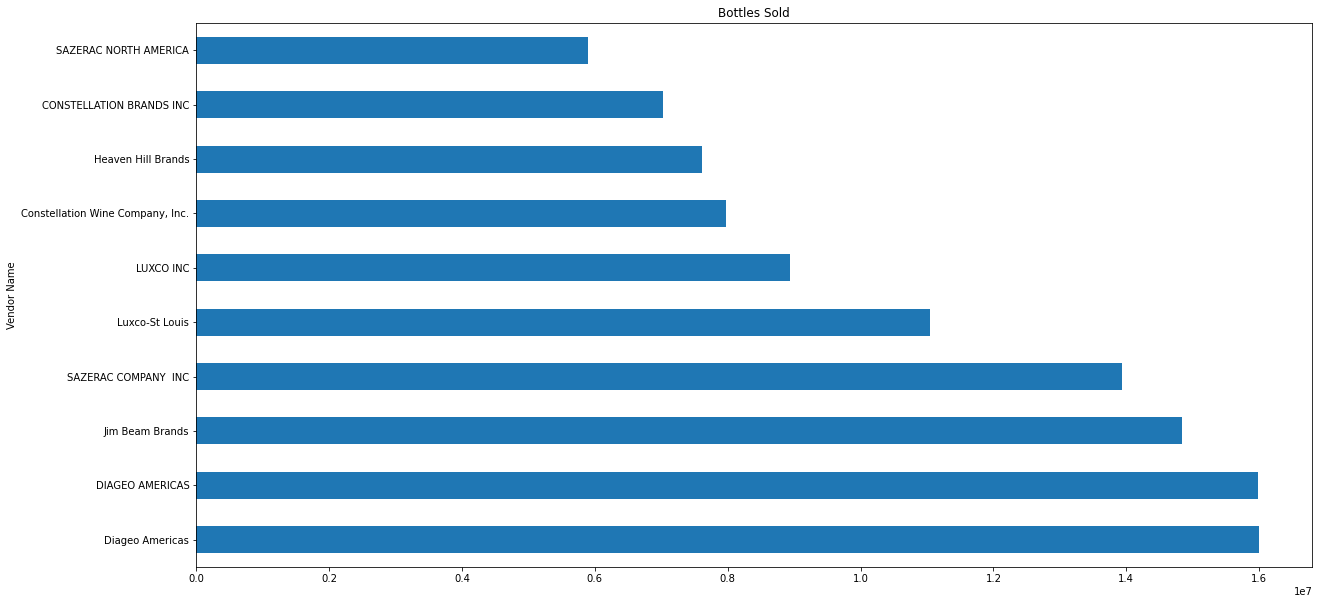

In [18]:
ILS2.groupby('Vendor Name')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

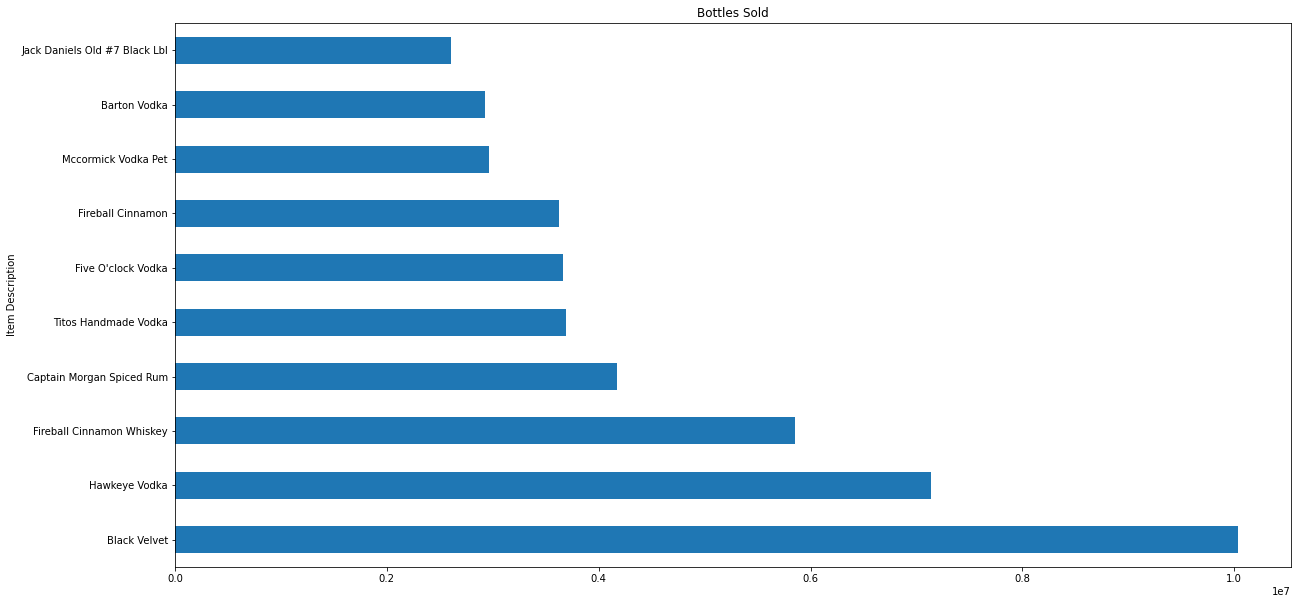

In [19]:
ILS2.groupby('Item Description')['Bottles Sold'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Bottles Sold')
plt.show()

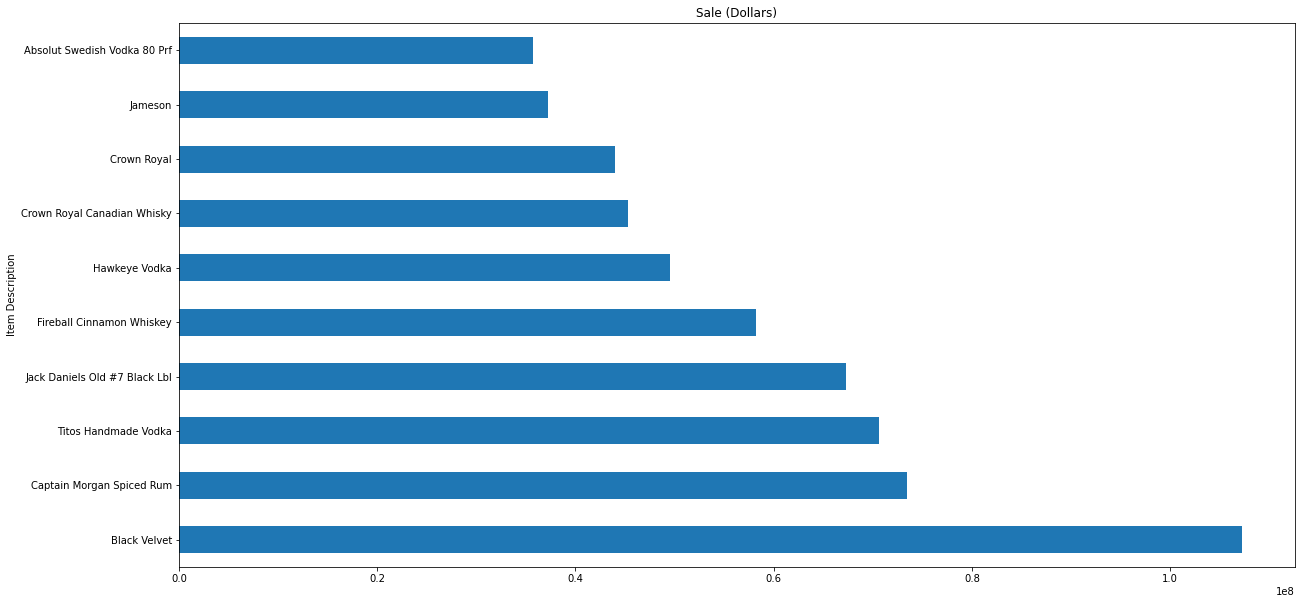

In [20]:
ILS2.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(20,10))
plt.title('Sale (Dollars)')
plt.show()

In [21]:
ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
ILS_cleaned['Zip Code'] = ILS_cleaned['Zip Code'].str.replace(r'-', '')

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1650728067.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1650728067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ILS_cleaned['Invoice/Item Number'] = ILS_cleaned['Invoice/Item Number'].str.replace(r'\D', '')
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1650728067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [22]:
## Here we cleaned a few unwanted features from the datatset.

# ILS_cleaned.drop("Date", axis=1,inplace= True)
ILS_cleaned["Bottles_Sold"] = ILS_cleaned["Bottles Sold"]
ILS_cleaned.drop("Bottles Sold", axis=1)
ILS_cleaned.drop(ILS_cleaned.columns.difference(['Invoice/Item Number','Store Number','Zip Code','County Number', 'Bottles_Sold','Volume Sold (Liters)']), 1, inplace=True)
ILS_cleaned.dropna(inplace=True)
X = ILS_cleaned.drop("Bottles_Sold", axis=1)
y = ILS_cleaned.Bottles_Sold

C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1133774373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ILS_cleaned["Bottles_Sold"] = ILS_cleaned["Bottles Sold"]
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1133774373.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ILS_cleaned.drop(ILS_cleaned.columns.difference(['Invoice/Item Number','Store Number','Zip Code','County Number', 'Bottles_Sold','Volume Sold (Liters)']), 1, inplace=True)
C:\Users\ruwin\AppData\Local\Temp/ipykernel_5772/1133774373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [23]:
# The datasset is spilt into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [24]:
#Defining Random Forest Regressor Model

model = HyperoptEstimator(
    regressor=random_forest_regression('reg')
    , preprocessing=any_preprocessing('pre')
    , algo=tpe.suggest
    , max_evals=50
    , trial_timeout=300
) 

In [25]:
#perform the search
model.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:30<00:00, 30.79s/trial, best loss: 0.4792972210626698]


C:\Users\ruwin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


In [26]:
# Print R2 value
print(model.score(X_test, y_test))

-51.855482324244385


In [27]:
#Identify Best Hyperparameters 
print(model.best_model())

{'learner': RandomForestRegressor(bootstrap=False, criterion='mse', max_features=None,
                      n_estimators=68, n_jobs=1, random_state=4, verbose=False), 'preprocs': (MinMaxScaler(feature_range=(-1.0, 1.0)),), 'ex_preprocs': ()}


In [29]:
# Dump to PKL file 
joblib.dump(model, 'RF_model.pkl')

['RF_model.pkl']

In [30]:
# Create XGBoost Model
estim = HyperoptEstimator(regressor=xgboost_regression('xgreg'),
                          preprocessing=any_preprocessing('pre'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=300)




In [31]:
estim.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [04:57<00:00, 297.67s/trial, best loss: 0.4817495698839831]
[03:41:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
print(estim.score(X_test, y_test))

0.9024392409722292


In [33]:
## Best hyperparameters
print(estim.best_model())

{'learner': XGBRegressor(base_score=0.5, booster='gbtree',
             colsample_bylevel=0.6108749864742665, colsample_bynode=1,
             colsample_bytree=0.5125857952350454, enable_categorical=False,
             gamma=0.015177105956199704, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1393110385884146,
             max_delta_step=0, max_depth=9, min_child_weight=2, missing=nan,
             monotone_constraints='()', n_estimators=2000, n_jobs=16,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=1, reg_alpha=0.0011669673381968124,
             reg_lambda=2.67696635086539, scale_pos_weight=1, seed=1,
             subsample=0.7393979571256765, tree_method='exact',
             validate_parameters=1, verbosity=None), 'preprocs': (), 'ex_preprocs': ()}


In [34]:
joblib.dump(estim, 'XGB_model.pkl')

['XGB_model.pkl']

In [44]:
# Creating KNN Model
from sklearn.metrics import mean_absolute_error
knnmodel = HyperoptEstimator(regressor=knn_regression('knnreg'),
                          preprocessing=any_preprocessing('my_pre'),
                          algo=tpe.suggest,
                          max_evals=50,
                          trial_timeout=300,
                          loss_fn=mean_absolute_error)


In [45]:
knnmodel.fit(X_train.values, y_train.values)

100%|██████████| 50/50 [00:07<00:00,  7.50s/trial, best loss: 1.4696775631539318]


In [46]:
print(knnmodel.score(X_test, y_test))

-0.6371758367775693


In [47]:
print(knnmodel.best_model())

{'learner': KNeighborsRegressor(metric='manhattan', n_jobs=1, n_neighbors=2, p=1,
                    weights='distance'), 'preprocs': (PCA(n_components=5, whiten=True),), 'ex_preprocs': ()}


In [48]:
joblib.dump(knnmodel, 'KNN_model.pkl')

['KNN_model.pkl']

In [62]:
knn_y_predict = knnmodel.predict(X_test)
xgb_y_predict = estim.predict(X_test)
rfr_y_predicts =  model.predict(X_test)

In [79]:
# Regression Metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


errors = mean_squared_error(y_test, knn_y_predict, squared=False)
r2 = r2_score(y_test,knn_y_predict)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,knn_y_predict)))
print('R2 :',r2)

MSE : 30.234510221094833
RMSE : 30.234510221094833
R2 : -0.6371758367775693


In [80]:
errors = mean_squared_error(y_test,xgb_y_predict , squared=False)
r2 = r2_score(y_test,xgb_y_predict)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,xgb_y_predict)))
print('R2 :',r2)

MSE : 7.380620239832052
RMSE : 7.380620239832052
R2 : 0.9024392409722292


In [81]:
errors = mean_squared_error(y_test,rfr_y_predicts , squared=False)
r2 = r2_score(y_test,rfr_y_predicts)
# report error
print('MSE :',errors)
print("RMSE :",np.sqrt(mean_squared_error(y_test,rfr_y_predicts)))
print('R2 :',r2)

MSE : 171.7909553023628
RMSE : 171.7909553023628
R2 : -51.855482324244385


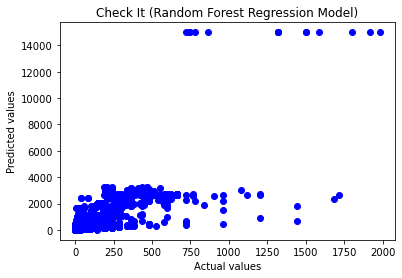

In [86]:
## Visualizing Predicted vs Actual Values
plt.scatter(y_test, rfr_y_predicts, color = 'blue')
plt.title('Check It (Random Forest Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

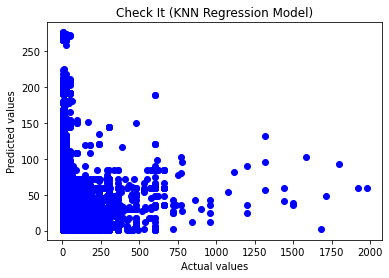

In [87]:
plt.scatter(y_test, knn_y_predict, color = 'blue')
plt.title('Check It (KNN Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

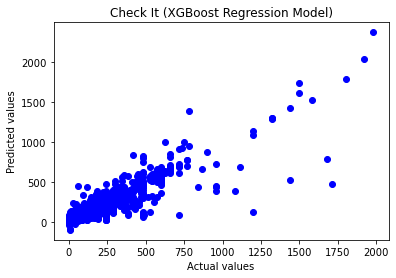

In [88]:
plt.scatter(y_test, xgb_y_predict, color = 'blue')
plt.title('Check It (XGBoost Regression Model)')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

<AxesSubplot:xlabel='County Number'>

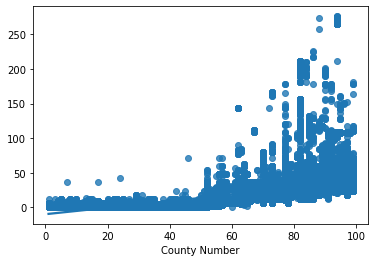

In [93]:
### Visualze Sales Predictions for Different Counties
sns.regplot(x=X_test['County Number'], y=knn_y_predict)

<AxesSubplot:xlabel='County Number'>

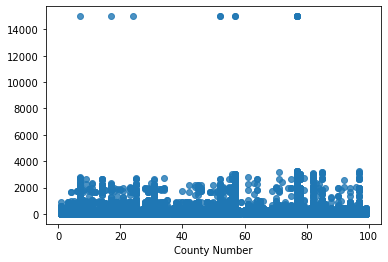

In [94]:
sns.regplot(x=X_test['County Number'], y=rfr_y_predicts)

### Machine Learning Predictions & Outcomes 

### Visualizations of Results

### Tralier Documentation 

### Additional Features 

### Final Remarks from each Member 

#### Ruwindhu Hettige Don - 

#### Thimantha Vidanagamage - 

#### Suheet Sonawane - 

#### Samarpan Pandey - 

#### Tirthesh Jani - 

### References 
* Arora, T., Chandna, R., Conant, S., Sadler, B., & Slater, R. (2020). Demand Forecasting In Wholesale Alcohol Distribution: An Ensemble Approach. SMU Data Science Review, 3(1). Retrieved 11 February 2022, from https://scholar.smu.edu/datasciencereview/vol3/iss1/7.

* By the numbers: How important is December for the liquor business?. (2019). [Blog]. Retrieved 11 February 2022, from https://liquorbarn.com/by-the-numbers-how-important-is-december-for-the-liquor-business/.

* Hirche, M., Haensch, J., & Lockshin, L. (2021). Comparing the day temperature and holiday effects on retail sales of alcoholic beverages – a time-series analysis. International Journal Of Wine Business Research, 33(3), 432-455. https://doi.org/10.1108/ijwbr-07-2020-0035
* Inventory Management using Machine Learning. (2020), V9(06). https://doi.org/10.17577/ijertv9is060661
* Kochak, A., & Sharma, S. (2015). DEMAND FORECASTING USING NEURAL NETWORK FOR SUPPLY CHAIN MANAGEMENT. Lijmerr. Retrieved 11 February 2022,.
* Hyperopt-Sk Learn Documentation - hyperopt-sklearn by hyperopt
* Analytics Vidya - Hyperopt - Alternative Hyperparameter Optimization Technique (analyticsvidhya.com)

